# Attractor recovery score plot

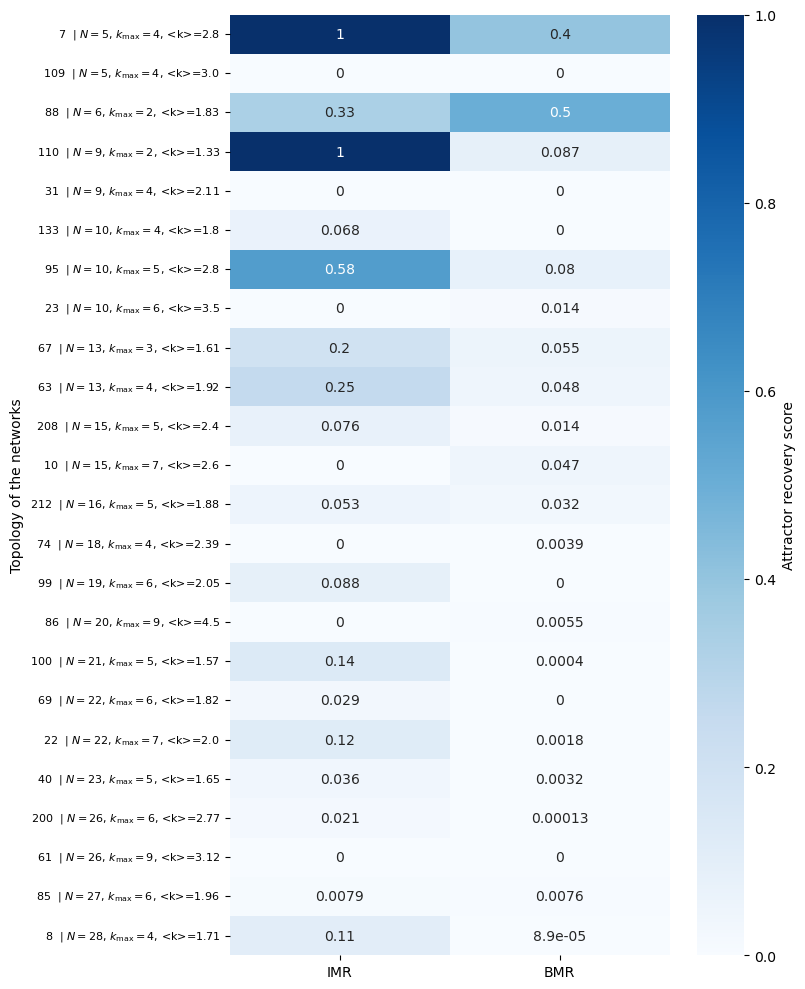

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../output/attractor_recovery.tsv', sep = '\t')

fraction_cols = ['att_recovery_score_IMR', 'att_recovery_score_BMR']
df_renamed = df.rename(columns={'att_recovery_score_IMR': 'IMR', 'att_recovery_score_BMR': 'BMR'})
df_renamed.set_index('model_no', inplace=True)
df_renamed = df_renamed.sort_values(by=['tot_nodes', 'max_indeg', 'mean_indeg'])

ytick_labels = [f"{idx}  | μ={round(mean, 2)}" for idx, mean in zip(df_renamed.index, df_renamed['mean_indeg'])]
ytick_labels = [
    f"{idx}  | $N={N}$, $k_{{\mathrm{{max}}}}={k_max}$, <k>={round(mean, 2)}"
    for idx, N, k_max, mean in zip(df_renamed.index, df_renamed['tot_nodes'], df_renamed['max_indeg'], df_renamed['mean_indeg'])
]

plt.figure(figsize=(8, 10))

ax = sns.heatmap(df_renamed[['IMR', 'BMR']], annot=True, cmap="Blues", vmin=0, vmax=1,
                 cbar_kws={"label": "Attractor recovery score"})

ax.set_yticklabels(ytick_labels, rotation=0, fontsize=8)
plt.ylabel("Topology of the networks")
plt.tight_layout()
plt.savefig('../output/att_recovery_score.pdf', dpi = 600)
plt.show()

#  Plot of JS distances of the basin fractions of the published model and TMRs from the gold standard distribution

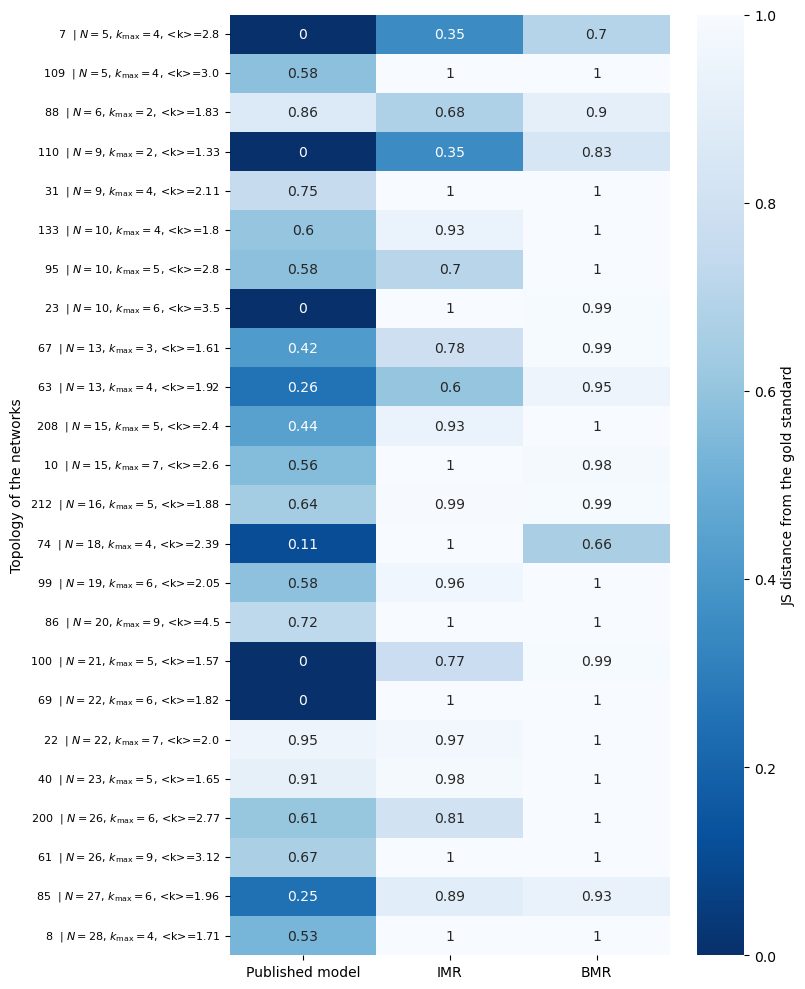

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../output/basin_recovery_JS_distance.tsv', sep = '\t')

fraction_cols = ['pub_gold_std_JS_dist', 'IMR_gold_std_JS_dist', 'BMR_gold_std_JS_dist']
df_renamed = df.rename(columns={'pub_gold_std_JS_dist': 'Published model' ,'IMR_gold_std_JS_dist': 'IMR', 'BMR_gold_std_JS_dist': 'BMR'})
df_renamed.set_index('model_no', inplace=True)
df_renamed = df_renamed.sort_values(by=['tot_nodes', 'max_indeg', 'mean_indeg'])

ytick_labels = [f"{idx}  | μ={round(mean, 2)}" for idx, mean in zip(df_renamed.index, df_renamed['mean_indeg'])]
ytick_labels = [
    f"{idx}  | $N={N}$, $k_{{\mathrm{{max}}}}={k_max}$, <k>={round(mean, 2)}"
    for idx, N, k_max, mean in zip(df_renamed.index, df_renamed['tot_nodes'], df_renamed['max_indeg'], df_renamed['mean_indeg'])
]

plt.figure(figsize=(8, 10))

ax = sns.heatmap(df_renamed[['Published model', 'IMR', 'BMR']], annot=True, cmap="Blues_r", vmin=0, vmax=1,
                 cbar_kws={"label": "JS distance from the gold standard"})

ax.set_yticklabels(ytick_labels, rotation=0, fontsize=8)
plt.ylabel("Topology of the networks")
plt.tight_layout()
plt.savefig('../output/basin_recovery_score_JS.pdf', dpi = 600)
plt.show()